# Classfication in Python

In de statistiek is Regressie Analyse het schatten van een verband tussen variabelen. Met lineaire regressie kunnen we een lineair verband tussen variabelen beschrijven en de beschrijvende functie bijvoorbeeld gebruiken om een **waarde** voor de afhankelijke variabele te schatten voor een of meer onafhankelijke variabelen. Vaak is de waarde een reel getal.

#### Classificatie

Een andere taak is het classificeren van data: gegeven de waarde van een of meer onafhankelijke variabelen $x$ een schatting maken tot welke klasse $y$ het datapunt behoort. We beginnen met kijken naar binaire classificatie, bijvoorbeeld man/vrouw, ziek/niet ziek of spam/geen spam. Merk op dat het de bedoeling is dat de klassen in de populatie disjunct en totaal zijn (m.a.w. elk datapunt behoort tot precies 1 van de 2 klassen).

Om regressieanalyse te kunnen gebruiken voor classificatie, kunnen we de klassen simpleweg coderen als 0 of 1. 

$$y \in \{0,1\}$$

Als we echter een eenvoudige least squares kostenfunctie gebruiken voor het leren van een classificatiemodel, dan merken we waarschijnlijk dat dit verre van optimaal werkt. Dit komt door de gevoeligheid van least-squares voor outliers. Om de kosten van outliers te beperken zal een lineaire regressielijn worden gefit die rond extreem hoge en lage waarden van de onafhankelijke variabelen in de buurt van respectievelijk 0 en 1 blijft. Punten rond de **decision boundary** (de grens waartussen een hogere kans op een 0 verandert in een hogere kans voor een 1) is van ondergeschikt belang. We zien daarom dat in praktijk lineaire regressie slecht werkt voor classificatie problemen.

#### Logistic function

Om een goede classifier te leren, willen we liefst de waarde 0 of 1 voorspellen. In onduidelijke gevallen is het misschien niet erg om 0.6 te voorspellen, maar het heeft in elk geval geen zin als er 33 als uitkomst wordt gegeven. Daarnaast willen we het belang van misclassificaties over alle datapunten meer gelijk trekken, dus punten rond de decision boundary (de overgang tussen de twee klassen) zouden de ligging van de classificatiefunctie even sterk moeten beinvloeden als punten die verder weg liggen.

De meest populaire functie die hiervoor wordt gebruikt is de sigmoid of logistic function $logit$ :

$$ logit(z) = \frac{1}{1+e^{-z}} $$

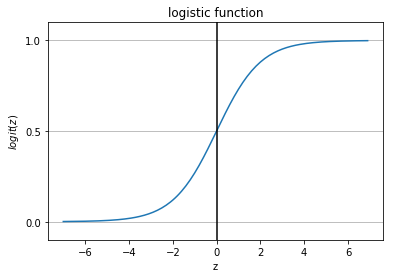

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

def logit(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = logit(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$logit(z)$')
plt.title('logistic function')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)


De logistic functie is afgeleid van de odds-ratio: de kans op succes gedeeld door de kans van slagen. Daardoor is de uitkomst van de logistic function gerelateerd aan een kans en wordt de uitkomst van de logistic functie vaak opgevat als de kans $P(\varsigma(z) = 1 | z)$.

We zien in de grafiek dat de logistic functie uitkomsten geeft tussen 0 en 1. Op $z=0$ ligt de decision boundary, links van deze boundary is de kans groter dat $y=0$, rechts is de kans groter dat $y=1$.

#### Logistic Regression model

Eerder hebben we een functie/hypothese $h_\theta(x) = \theta^T \cdot x$ geleerd om een afhankelijke variabele te schatten op basis van onafhankelijke variabele(n) $x$. We passen de vorm van de hypothese aan door een logistic functie toe te voegen:

$$ h_\theta(x) = \varsigma( \theta^T \cdot x ) $$

Deze vorm van de hypothese heeft een aantal voordelen. De uitkomsten van $h_\theta(x)$ liggen nu tussen 0 en 1 en het model is niet meer lineair. De parameters $\theta$ kunnen zo worden gekozen dat de overgang samenvalt met het gebied waarin de kans op de klassen dicht bij elkaar ligt.

We interpreteren de uitkomst van de logistic regression hypothese $h_\theta(x)$ als de estimated probability dat $y=1$ bij input $x$:

$$ h_\theta(x) = P(y = 1 | x; \theta) $$

Omdat voor classificatie $y$ alleen de waarden 0 of 1 aan kan nemen, spreken we af:

$$ y = \begin{cases}{} 
0, \text{for}\ h_\theta(x) < 0.5 \\
1, \text{otherwise}
\end{cases}  $$

#### Logistic Regression kostenfunctie

Als we voor de kosten voor logistic regression een least squares functie gebruiken dan levert dat in praktijk een kostenfunctie op met vele lokale minima (m.a.w. een niet convexe functie). Dat betekent dat het moeilijk wordt om met gradient descent het globale minimum te vinden. Maar er bestaat voor logistic regression een functie om de kosten uit te drukken die leidt tot een kostenfunctie die wel convex is :

$$
cost(h_\theta(x), y) = \begin{cases}{}
-log(h_\theta(x)) &, if y = 1\\
-log(1 - h_\theta(x)) &, if y = 0
\end{cases}
$$

Als we deze functie kort analyseren dan zien we dat als $y = h_\theta(x)$ de kosten 0 zijn. Immers, als $y = 1$ en $h_\theta(x) = 1$ zijn de kosten $-log(1)=0$. En ook als $y = 0$ en $h_\theta(x) = 0$ dan zijn de kosten $-log(1 - 0) = 0$. Aan de andere kant, als $h_\theta(x) = 0.5$ dan zijn de kosten ongeveer 0.69 onafhankelijk van $y$. We zien dat deze functie meer dan evenredig hogere kosten rekent voor grotere afwijkingen van de werkelijke waarde. In geval van totale misclassificatie, bijvoorbeeld bij $y = 1$ en $h_\theta(x) = 0$ zijn de kosten $\infty$. Het scenario van grove misclassificatie mag eigenlijk nooit voorkomen, dat is namelijk zoiets als zeggen er 0 kans is dat de patient ziek is, terwijl deze het wel is. 

Als we deze bendering van de kosten toepassen, dan krijgen we de volgende kostenfunctie:

$$ J(\theta) = \frac{1}{m} \sum_i^m cost(h_\theta(x^{(i)}), y^{(i)})
$$

Om de implementatie te vergemakkelijken kunnen we dit ook schrijven als:

$$ J(\theta) = \frac{1}{m} \sum_i^m -y^{(i)} \cdot log(h_\theta(x^{(i)})) - (1-y^{(i)}) \cdot log(1 - h_\theta(x^{(i)}))
$$


#### Gradient Desscent update functies

Om met Gradient Descent de coefficienten stapsgewijs in de richting van het minimum te verplaatsen hebben we wederom een update functie nodig:

$$ \theta_j = \theta_j - \alpha \frac{\delta}{\delta \theta_j}J(\theta) $$

De partial derivative voor de kostenfunctie is:

$$ \frac{\delta}{\delta \theta_j}J(\theta) = \frac{1}{m} \sum_i^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j $$

De update rule wordt dan:

$$ \theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j $$

NB de update rule voor logistic regression is in feite gelijk aan de update rule voor linear regression, behalve dat de hypothese $h_\theta(x)$ nu een logistic functie bevat.

#### Vectorization

Bij voorkeur gebruiken we vectorized implementatie. Daarmee bedoelen we dat we in plaats van elke $\theta_j$ apart updaten, de hele matrix $\theta$ met een toekenning kunnen updaten. vectorization heeft 3 voordelen: de code ziet er korter en leesbaarder uit, bij de implementatie maak je daardoor minder snel fouten en vectorization is vaak heel veel sneller. Voor deze update rule is de vectorization simpelweg:

$$ \theta := \theta - \frac{\alpha}{m} \cdot \sum_{i=1}^m [h_\theta(x^{(i)}) - y^{(i)}] \cdot x^{(i)} = \theta - \frac{\alpha}{m} \cdot X^T \cdot (\ \varsigma(X \cdot \theta) - y )$$

#### Implementatie van Logistic Regression met Gradient Descent

We laden wederom eerst de data en prepareren een matrix $X$ met input data en $y$ met de te verklaren variabele. Om er een classificatie taak van te maken, proberen we te voorspellen of de wijn op `quality` een voldoende scoort. We maken daarvan een vector $y$ waarbij $y = 1$ als quality >= 6 en anders 0. Het makkelijkst is om hiervoor een kolom `good` aan te maken in het Pandas Dataframe.

In [2]:
import pandas as pd
import numpy as np
from scipy.special import expit as logit # is more stable in case of overflows
wijnen = pd.read_csv('winequality-red.csv', delimiter=';')

wijnen['bias'] = 1
wijnen['good'] = 1 * (wijnen.quality >= 6)
X = np.matrix(wijnen[['bias', 'alcohol','pH']])
y = np.matrix((1 * (wijnen.quality >= 6))).T

In [3]:
wijnen[['alcohol', 'pH', 'good']][:10]

,alcohol,pH,good
0,9.4,3.51,0
1,9.8,3.20,0
2,9.8,3.26,0
3,9.8,3.16,1
4,9.4,3.51,0
5,9.4,3.51,0
6,9.4,3.30,0
7,10.0,3.39,1
8,9.5,3.36,1
9,10.5,3.35,0


#### Train/test split

We splitsen onze dataset in een deel dat we kunnen gebruiken om het model te leren en een deel dat we achterhouden om de evaluatie uit te voeren. Dat is **nodig om objectief te kunnen evalueren hoe goed het geleerde model is**. We maken daarvoor gebruik van de `train_test_split()` functie van de `sklearn` library. De parameter `test_size` bepaalt de fractie random gekozen datapunten die aan de test set worden toegewezen, de rest wordt aan de training set toegewezen. Door een waarde voor de `random_state` mee te geven wordt ons experiment herhaalbaar, dwz elke keer wordt dezelfde random sample voor de test set gekozen.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We bekijken eerst hoe de data eruit ziet in een scatter plot. Een groene stip betekent dat de quality >= 6 en een rode stip < 6. De plot toont ons dat op basis van alcohol percentage en pH waarde geen perfecte classificatie van goede/slechte wijn mogelijk is, maar we kunnen ons een decision boundary voorstellen waarbij een hoger percentage goede wijn aan de ene kant ligt en een hoger percentage slechte wijn aan de andere kant. 

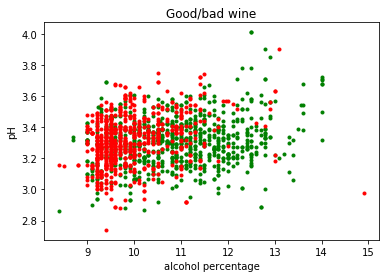

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
def scatter():
    wijngood = wijnen.where(wijnen.quality >= 6)
    wijnbad  = wijnen.where(wijnen.quality < 6)
    plt.plot(wijngood.alcohol, wijngood.pH, '.', color='green')
    plt.plot(wijnbad.alcohol, wijnbad.pH, '.', color='red')
    plt.title('Good/bad wine')
    plt.ylabel('pH')
    plt.xlabel('alcohol percentage');
    
scatter()

Ter voorbereiding van de logistic regression stellen we een functie `h` op voor de hypothese. De hypothese kunnen we letterlijk overnemen uit bovenstaande afleiding. Net als bij lineaire regressie, wordt ons feitelijke model bewaard in een vector $\theta$ met de coefficienten van de decision boundary.

Om het model te kunnen gebruiken maken we een functie `predict`, die voor een set test cases `X` voorspelt welke wijnen als goed of slecht geclassificeerd worden. De uitkomst van de sigmoid mag worden geinterpreteerd als kans $P(y = 1| x; \theta)$, waardoor bij een uitkomst boven $0.5$ de kans groter is dat het om een goede wijn gaat en onder $0.5$ om een slechte wijn. In dit geval kiezen we ervoor om de grenswaarde toe te wijzen aan de klasse goede wijn. 

In [6]:
"""
Default logistic regression hypothesis
X: n x m matrix containing the input for n training examples, each having m features
theta: m x 1 matrix containing the coefficients for the model
Returns a predicted value [0, 1] for input values in X
"""
def h(X, theta):
    return logit(X * theta)

"""
X: n x m matrix containing the input for n training examples, each having m features
theta: m x 1 matrix containing the coefficients for the model
Returns true if the hypothesis for a given x >= 0.5 otherwise false
"""
def predict(X, theta):
    return h(X, theta) >= 0.5

De update rule voor logistic regression is:

$$ \theta := \theta - \frac{\alpha}{m} \cdot X^T \cdot (\ \varsigma(X \cdot \theta) - y )$$

Vervolgens schrijven we een functie `fit_model` die een benadering voor $\theta$ geeft door herhaaldelijk de update rule over de hele set toe te passen.

In [7]:
"""
Updates parameters theta for #iterations using the logistic regression update rule
X: n x m matrix containing the input for n training examples, each having m features
y: n x 1 matrix containing the correct class {0,1} for the n training examples
alpha: learning rate
iterations: number of iterations
returns: theta
"""
def fit_model(X, y, alpha=0.00001, iterations=50000):
    m = X.shape[1]            # het aantal coefficienten
    theta = np.zeros((m, 1))  # initialiseer theta
    for iter in range(iterations):
        theta -= (alpha / m) * X.T * ( logit(X * theta) - y )
    return theta

We fitten het model en bekijken de waarden van theta. We weten dat een uitkomst van lager dan 0 leidt tot een voorspelling van een slechte wijn en een uitkomst hoger dan 0 een goede wijn. Dus zien we aan de coefficient $\theta_0$ dat een hoge pH waarde geassocieerd wordt met een slechte wijn. Aan de coefficient $\theta_1$ kunnen we zien dat een hoger alcohol percentage geassocieerd wordt met een goede wijn.

In [8]:
%%time
theta = fit_model(X_train, y_train)
print(theta)

[[-0.97575129]
 [ 0.99000033]
 [-2.74727399]]
CPU times: user 2 s, sys: 75.7 ms, total: 2.07 s
Wall time: 1.99 s


Om de evaluatie makkelijker te herhalen schrijven we ook een functie `evaluate` om te bepalen voor hoeveel procent van de wijnen in $X$ het model $\theta$ de correcte klasse $y$ voorspelt. Bj deze eerste poging zien we dat 72% correct wordt geclassificeerd.

In [9]:
"""
X: n x m matrix containing the input for n training examples, each having m features
y: n x 1 matrix containing the correct class {0,1} for the n training examples
theta: m x 1 matrix containing the coefficients for the model
Returns percentage correctly predicted cases in X
"""
def evaluate(theta, X, y):
    return sum( predict(X, theta) == y ) / len(X)

In [10]:
evaluate(theta, X_test, y_test)

matrix([[ 0.72083333]])

Bij classificatie taken is het altijd een goed idee om even te checken hoe de verdeling over de klassen is. Bij een extreem scheve verdeling, bijvoorbeeld 1:99, zal een classifier die alles simpelweg toewijst aan de grootste klasse al 99% correct voorspellen. In dit geval bevat de grootste klasse 53.5% van de wijnen, dus duidt 70% erop dat ons model werkt.

In [11]:
sum(y)/len(y)

matrix([[ 0.53470919]])

We kunnen de decision boundary ook visualiseren. Daarvoor gebruiken we een 'sweep' over de input variabelen tussen hun kleinste en grootste waarde in de dataset. Voor elke combinatie van alcohol berekenen we $P(y = 1|x;\theta)$ en trekken de decision boundary op $p = 0.5$.

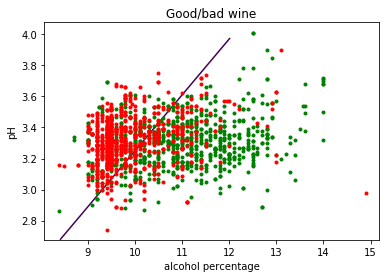

In [12]:
def plot_decision_boundary(theta):
    ax = plt.gca()
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    X = np.matrix(np.vstack([np.ones(xx.shape[0] * xx.shape[1]), xx.ravel(), yy.ravel()])).T
    boundary = logit(X * theta)
    boundary = boundary.reshape(xx.shape)

    x_vec = np.linspace(*ax.get_xlim())
    y_vec = np.linspace(*ax.get_ylim())
    ax.contour(xx, yy,
           boundary,
           levels=[0.5])
    
scatter()
plot_decision_boundary(theta)

Wat kunnen we proberen om de effectiviteit te verbeteren? Een van de mogelijkheden is het gebruik van meer features. We zien dat het gebruik van alle features een model oplevert dat 73% correct classificeert.

In [13]:
Xall = np.matrix(wijnen[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'bias']])
Xall_train, Xall_test, _, _ = train_test_split(Xall, y, test_size=0.3, random_state=0)
theta = fit_model(Xall_train, y_train)
evaluate(theta, Xall_test, y_test)

matrix([[ 0.73333333]])